In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [15]:
print(f'Lenght of the training dataset: {len(X_train)}')
print(f'Lenght of the testing dataset: {len(X_test)}')

Lenght of the training dataset: 50000
Lenght of the testing dataset: 10000


In [16]:
print(X_test[789])

[[[100 111 134]
  [ 98 110 132]
  [ 98 109 131]
  ...
  [ 69  89 114]
  [ 67  87 113]
  [ 66  86 111]]

 [[ 98 109 131]
  [ 95 106 128]
  [ 94 105 127]
  ...
  [ 65  85 110]
  [ 64  84 109]
  [ 63  83 107]]

 [[ 94 105 127]
  [ 92 103 125]
  [ 92 103 125]
  ...
  [ 63  83 108]
  [ 62  82 107]
  [ 60  80 105]]

 ...

 [[ 13  27  40]
  [ 12  26  39]
  [ 12  26  39]
  ...
  [  4   6  21]
  [  5   7  22]
  [  4   7  22]]

 [[ 12  24  38]
  [ 14  26  39]
  [  9  21  34]
  ...
  [  3   5  19]
  [  3   5  20]
  [  5   7  22]]

 [[ 14  23  34]
  [ 12  21  31]
  [  9  19  29]
  ...
  [  4   4  17]
  [  4   5  18]
  [  5   5  18]]]


(32, 32, 3)


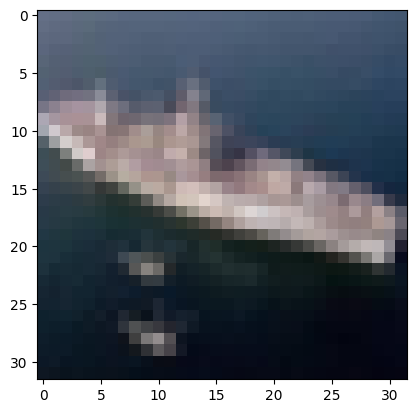

In [17]:
# Converting the pixel values into an image.
plt.imshow(X_test[789])
plt.show

print(X_test[789].shape)

In [18]:
# Adjusting our dataset.
X_val = X_train[40000:]
y_val = y_train[40000:]

X_train = X_train[:40000]
y_train = y_train[:40000]

In [19]:
print(f'X_train: {len(X_train)}')
print(f'X_val: {len(X_val)}')
print(f'X_test: {len(X_test)}')

X_train: 40000
X_val: 10000
X_test: 10000


In [20]:
# Normalizin part | Dividing each dataset by 255.
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

In [21]:
# Creating a model object.
model = tf.keras.Sequential()

In [22]:
# Adding a convolution and max pooling layer.
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,3)))

model.add(tf.keras.layers.MaxPool2D((2,2)))

In [23]:
# Adding more convolution and max pooling layers.
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPool2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

In [24]:
# Flattening the convolution layer to connect the 2D convolution to 1D dense layers.
model.add(tf.keras.layers.Flatten())

In [25]:
# Adding the dense layers and dropout layers. (Classification layers)
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5)) 

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [26]:
# Adding the output layer.
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [27]:
# Compiling the model.
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [28]:
# Training the model for 50 epochs with batch size of 128

results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
313/313 [==============================] - 13s 10ms/step - loss: 2.0002 - accuracy: 0.2333 - val_loss: 1.6487 - val_accuracy: 0.4199
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.6898 - accuracy: 0.3579 - val_loss: 1.4322 - val_accuracy: 0.4861
Epoch 3/50
313/313 [==============================] - 2s 7ms/step - loss: 1.5284 - accuracy: 0.4265 - val_loss: 1.2920 - val_accuracy: 0.5448
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.4200 - accuracy: 0.4782 - val_loss: 1.1794 - val_accuracy: 0.5921
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.3349 - accuracy: 0.5164 - val_loss: 1.0961 - val_accuracy: 0.6185
Epoch 6/50
313/313 [==============================] - 3s 8ms/step - loss: 1.2794 - accuracy: 0.5376 - val_loss: 1.0878 - val_accuracy: 0.6317
Epoch 7/50
313/313 [==============================] - 2s 7ms/step - loss: 1.2217 - accuracy: 0.5613 - val_loss: 1.0217 - val_accuracy: 0.6516
Epoc

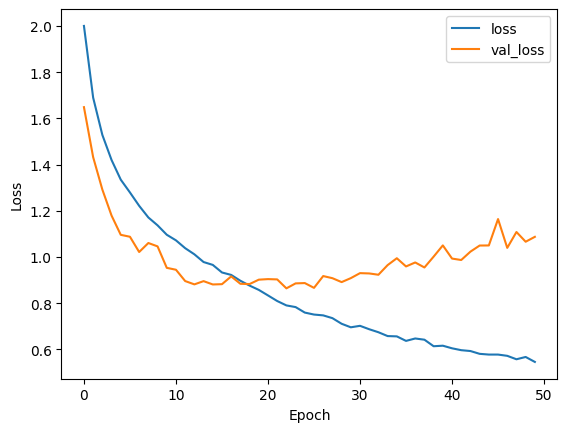

In [29]:
# Visualizing the results.
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()


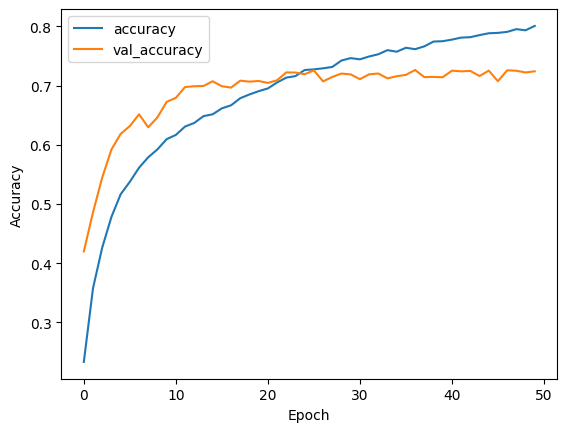

In [30]:
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()

In [31]:
# Evaluating the performance.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1427 - accuracy: 0.7115


[1.142651915550232, 0.7114999890327454]

In [32]:
# Making prediction on the reshaped sample.
prediction_result = model.predict(X_test[789].reshape(1,32,32,3))
prediction_result

1/1 [==============================] - 0s 181ms/step


array([[1.06975725e-02, 1.71725523e-09, 8.43310075e-11, 5.71609004e-14,
        3.83741783e-18, 1.13556008e-17, 2.53107865e-13, 8.90113951e-21,
        9.89302456e-01, 1.42379575e-09]], dtype=float32)

In [33]:
# Finding the predicted class.
predicted_class = prediction_result.argmax()

# Finding the prediction probability.
predicted_probability = prediction_result.max()

In [34]:
# Printing the results.
print(f'This image belongs to class {predicted_class} with {predicted_probability}')

This image belongs to class 8 with 0.9893024563789368
